In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Summary

Suppose one has data that consists of an independent vector and a dependent vector $x_i$ and $y_i$ ($i$ is the ith value in the data set). For example:

* $x_i$ is the height of the $i$th person, and $y_i$ is their weight (predict weight using height)
* $x_i$ is a picture of a handwritten digit, and $y_i$ is the digit itself (predict numbers from hand written numbers)
* $x_i$ is a CT scan of a patient, and $y_i$ are the corresponding pixels corresponding to tumours (my research)

The goal of a neural network is as follows. Define a function $f$ that depends on parameters $a$ that makes predictions

$$\hat{y_i} =f(x_i;a)$$

One wants to make $\hat{y_i}$ (the predictions) and $y_i$ (the true values) as close as possible by modifying the values of $a$. What does as close as possible mean? This depends on the task. In general, one defines a similarity function (or **Loss** function) $L(y,\hat{y})$. The more similar all the $y_i$s and $\hat{y_i}$s are, the smaller $L$ should be. For example 1 above, this could be as simple as 

$$L(y,\hat{y}) = \sum_i(y_i-\hat{y_i})^2$$


# Last Video

Given 4 data points $(x_i, y_i)$ and wanted to find a function $f$ such that $f(x_i)=y_i$. Since each $x_i$ was a vector of length $2$, we chose the function

$$f(x) = A_2 A_1 x$$

where $A_1$ is a $8 \times 2$ matrix and $A_2$ is a $1 \times 8$ matrix. This means there were $16+8$ free parameters. This simple function did not do a very good job of making $f(x_i)=y_i$. 

In [4]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
    def forward(self,x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()
    
f = MyNeuralNet()
opt = SGD(f.parameters(), lr=0.001)
L = nn.MSELoss()

# Train model
losses = []
for _ in range(50):
    opt.zero_grad() # flush previous epoch's gradient
    loss_value = L(f(x), y) #compute loss
    loss_value.backward() # compute gradient
    opt.step() # Perform iteration using gradient above
    losses.append(loss_value.item())

/hpfs/userws/penshs/.conda/envs/hugface/lib/python3.9/site-packages/transformers/utils/hub.py:123: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [5]:
y

tensor([1., 5., 2., 5.])

In [6]:
f(x)

tensor([3.0009, 2.6444, 1.6489, 5.0806], grad_fn=<SqueezeBackward0>)

# This Video

As it turns out, our previous model was not very good at all. In fact, although there were 24 parameters in the two matrices, there was technically only **two** independent parameters. This is because

$$A_2 A_1 = B$$

where $B$ is a $2 \times 1$ matrix. So really our function was $f(x) = Bx$

## How can we use this simplicity of linear algebra but have advanced models?

**The Crux of Machine Learning**: This lies in so-called activation functions, which add ever-so-slight non-linearities to a sequence of matrix transformations. Instead of the transformation

$$\text{Old Model}: \hspace{5mm} f(x) = A_2 A_1 x$$

consider instead

$$\text{New Model}: \hspace{5mm} f_2(x) = A_2 R(A_1 x)$$

where $R$ is an element-wise operator defined by

$$R(x) = \begin{cases}x & x>0 \\ 0&  x \leq 0 \end{cases}$$

So $R$ is the identity function if $x>0$ but sets values equal to zero if $x$ is less than zero. This is **so-close** to being a linear operator, but it is not. 

In [10]:
x = torch.tensor([[4,6,2,-1,6,2,5],[1,6,2,-6,5,-3,5]])
x

tensor([[ 4,  6,  2, -1,  6,  2,  5],
        [ 1,  6,  2, -6,  5, -3,  5]])

In [12]:
R = nn.ReLU()
R(x)

tensor([[4, 6, 2, 0, 6, 2, 5],
        [1, 6, 2, 0, 5, 0, 5]])

Another example

In [13]:
x = torch.linspace(-3,3,100)

In [14]:
x

tensor([-3.0000, -2.9394, -2.8788, -2.8182, -2.7576, -2.6970, -2.6364, -2.5758,
        -2.5152, -2.4545, -2.3939, -2.3333, -2.2727, -2.2121, -2.1515, -2.0909,
        -2.0303, -1.9697, -1.9091, -1.8485, -1.7879, -1.7273, -1.6667, -1.6061,
        -1.5455, -1.4848, -1.4242, -1.3636, -1.3030, -1.2424, -1.1818, -1.1212,
        -1.0606, -1.0000, -0.9394, -0.8788, -0.8182, -0.7576, -0.6970, -0.6364,
        -0.5758, -0.5152, -0.4545, -0.3939, -0.3333, -0.2727, -0.2121, -0.1515,
        -0.0909, -0.0303,  0.0303,  0.0909,  0.1515,  0.2121,  0.2727,  0.3333,
         0.3939,  0.4545,  0.5152,  0.5758,  0.6364,  0.6970,  0.7576,  0.8182,
         0.8788,  0.9394,  1.0000,  1.0606,  1.1212,  1.1818,  1.2424,  1.3030,
         1.3636,  1.4242,  1.4848,  1.5455,  1.6061,  1.6667,  1.7273,  1.7879,
         1.8485,  1.9091,  1.9697,  2.0303,  2.0909,  2.1515,  2.2121,  2.2727,
         2.3333,  2.3939,  2.4545,  2.5152,  2.5758,  2.6364,  2.6970,  2.7576,
         2.8182,  2.8788,  2.9394,  3.00

In [15]:
y = R(x)

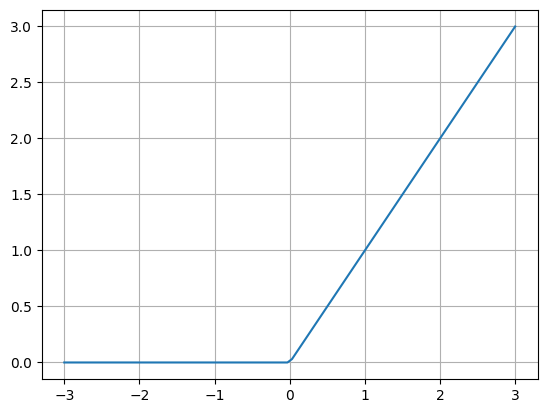

In [16]:
plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.show()

How much better does our model do with this simple adjustment?

In [18]:
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

Train model (lets write a function to do this, since we'll be doing it a lot)

In [19]:
def train_model(x,y,f, n_epochs=50):
    opt = SGD(f.parameters(), lr=0.001)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in range(n_epochs):
        opt.zero_grad() # flush previous epoch's gradient
        loss_value = L(f(x), y) #compute loss
        loss_value.backward() # compute gradient
        opt.step() # Perform iteration using gradient above
        losses.append(loss_value.item())
    return f, losses

In [20]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f2 = MyNeuralNet2()

# Train model
f2, losses2 = train_model(x,y,f2, n_epochs=5000)

Now lets look at the predictions:

In [21]:
y

tensor([1., 5., 2., 5.])

In [22]:
f(x)

tensor([3.0009, 2.6444, 1.6489, 5.0806], grad_fn=<SqueezeBackward0>)

Slightly better. But the real advantage of this slight non-linearity is that we can make our matrices much larger. Lets make our matrices size $80 \times 2$ and $1 \times 80$. This **only** works because of our non-linearity function $R(x)$:

* Without $R(x)$, we would just have $A_2 A_1 = B$ and so $f(x) = Bx$ where $B$ is still a $1 \times 2$ matrix even though $A_2$ and $A_1$ are larger matrices. The non-linearity function $R(x)$, to some extent, makes all 240 parameters more independent from eachother.

$$\text{Old Model}: \hspace{5mm} f_2(x) = A_2 R(A_1 x) \hspace{8mm} \text{$A_2$ is 1x8 and $A_1$ is 8x2}$$

$$\text{New Model}: \hspace{5mm} f_3(x) = A_2 R(A_1 x)  \hspace{8mm} \text{$A_2$ is 1x80 and $A_1$ is 80x2}$$

In [23]:
class MyNeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80, bias=False)
        self.Matrix2 = nn.Linear(80,1, bias=False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

Train model:

In [24]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f3 = MyNeuralNet3()

# Train model
f3, losses3 = train_model(x,y,f3, n_epochs=5000)

In [25]:
y

tensor([1., 5., 2., 5.])

In [26]:
f3(x)

tensor([1.7701, 3.9439, 1.9380, 5.1075], grad_fn=<SqueezeBackward0>)

Closer, but still not exact. We can make our model better by introducing other parameters:

$$f(x) = A_2 R(A_1x + b_1) + b_2$$

where $b_1$ and $b_2$ are vectors added to each of the linear transformations.

$$\text{Old Model}: \hspace{5mm} f_3(x) = A_2 R(A_1 x) \hspace{8mm} \text{$A_2$ is 1x80 and $A_1$ is 80x2}$$

$$\text{New Model}: \hspace{5mm} f_4(x) = A_2 R(A_1 x+b_1)+b_2  \hspace{8mm} \text{$A_2$ is 1x80 and $A_1$ is 80x2}$$

In [27]:
class MyNeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80)
        self.Matrix2 = nn.Linear(80,1)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [28]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f4 = MyNeuralNet4()

# Train model
f4, losses4 = train_model(x,y,f4, n_epochs=5000)

In [29]:
y

tensor([1., 5., 2., 5.])

In [30]:
f4(x)

tensor([1.4744, 4.4056, 2.0159, 5.0232], grad_fn=<SqueezeBackward0>)

Better, but its still not getting us that close to $y$, however. What if we add another matrix in the middle?

$$\text{Old Model}: \hspace{5mm} f_4(x) = A_2 R(A_1 x+b_1)+b_2  \hspace{8mm} \text{$A_2$ is 1x80 and $A_1$ is 80x2}$$

$$\text{New Model}: \hspace{5mm} f_5(x) = A_3 R(A_2 R(A_1 x+b_1)+b_2)  \hspace{8mm} \text{$A_3$ is 1x80 and $A_2$ is 80x80 and $A_1$ is 80x2}$$



In [31]:
class MyNeuralNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80)
        self.Matrix2 = nn.Linear(80,80)
        self.Matrix3 = nn.Linear(80,1)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f5 = MyNeuralNet5()

# Train model
f5, losses5 = train_model(x,y,f5, n_epochs=5000)

In [32]:
y

tensor([1., 5., 2., 5.])

In [33]:
f5(x)

tensor([1.0033, 4.9969, 2.0000, 5.0007], grad_fn=<SqueezeBackward0>)

Its predicting $y$ almost exactly (albeit by overfitting, no doubt, but the message here is that the model has the potential to fit to these arbitrary data points, through a sequence of **linear** transofmrations followed by slightly non-linear )

# The "Sequential" Neural Network

A general "sequential" neural network can be expressed as

$$f(x) = \underset{i=1}{\overset{n}{\Huge{\kappa}}} R_i(A_ix+b_i)$$

where $\underset{i=1}{\overset{n}{\Huge{\kappa}}}f_i(x) = f_n \circ f_{n-1} ... \circ f_1(x)$ and the $A_i$ are matrices and the $b_i$ are bias vectors. Typically the $R_i$ are the same for all the layers (typically ReLU) **except** for the last layer, where $R_i$ is just is just the identity function

* **Note**: In clever architectures, like convolutional neural networks, the $A_i$'s become sparse matrices (most of there parameters are fixed to equal zero).

# Next Video

Training on some real data